In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [5]:
df = pd.DataFrame(X,columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.417852,1.131200,0.459365,0.414725,0.925747,1
1,2.452993,3.006003,1.611269,0.345542,-1.643093,1
2,2.177399,3.119891,2.015698,1.491738,-0.380048,1
3,1.073646,2.369256,-2.186990,-0.361019,1.454578,0
4,0.891598,1.094880,0.830297,-0.758977,0.363237,0


### function for row sampling

In [6]:
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]), replace= True)

### Function for feature sampling

In [8]:
def sample_feature(df,percent):
    cols = random.sample(df.colums.tolist()[:-1],int(percent*df.shape[1]))

### fUNCTION For Combined Sampling

In [9]:
def combined_sampling(df,row_percent,col_percent):
    new_df = sampl_rows(df,row_percent)
    return sample_feature(new_df,col_percent)

In [11]:
df1 = sample_rows(df,0.1)
df1

,col1,col2,col3,col4,col5,target
76,-1.093497,0.985900,1.353040,1.170938,2.234680,0
35,-3.469025,-0.677464,0.127731,2.570163,0.257122,0
40,-2.258091,-1.547276,-2.146370,0.130148,0.480909,1
91,-1.213328,2.394094,-3.089592,0.202419,1.423847,0
90,1.435049,1.523389,1.197845,0.841340,0.808871,1
55,-0.596457,2.294253,-2.611718,0.261863,1.706559,0
63,-0.274913,1.958722,0.506159,0.554707,2.548411,1
73,0.858240,0.021995,1.446051,1.961451,1.256468,0
51,-3.558826,0.103115,-2.529376,2.790290,0.786308,0
33,-1.494078,0.318994,-0.631800,0.810274,2.286794,1


In [12]:
df2 = sample_rows(df,0.1)
df2

,col1,col2,col3,col4,col5,target
9,-0.097108,1.378619,-1.799921,1.406692,2.006218,0
29,-2.112113,-0.187125,-0.274533,1.638943,-0.064316,0
4,0.891598,1.094880,0.830297,-0.758977,0.363237,0
67,0.775747,0.583914,1.565013,1.433500,1.904338,0
12,-0.023787,1.737764,-3.451649,1.638181,1.506730,1
95,1.017433,0.696742,1.157007,1.542073,1.218801,1
26,-1.105620,0.433294,0.173904,0.217028,-0.122156,0
31,1.079933,3.030569,1.492664,1.005797,1.105708,1
9,-0.097108,1.378619,-1.799921,1.406692,2.006218,0
4,0.891598,1.094880,0.830297,-0.758977,0.363237,0


In [13]:
df3 = sample_rows(df,0.1)
df3

,col1,col2,col3,col4,col5,target
82,1.964023,1.133527,1.686086,1.854317,-0.262899,1
81,-1.137297,-0.540620,1.356883,4.191036,2.926720,0
77,1.215275,2.259401,0.337471,-0.245785,2.398531,0
74,1.218374,3.184636,-1.715991,-1.721230,1.500281,0
52,1.550750,1.551660,1.373419,1.410409,-0.407926,1
88,1.010201,1.279337,1.073015,0.680760,1.546357,1
35,-3.469025,-0.677464,0.127731,2.570163,0.257122,0
84,0.190691,3.303425,0.775679,0.028907,1.662435,1
33,-1.494078,0.318994,-0.631800,0.810274,2.286794,1
2,2.177399,3.119891,2.015698,1.491738,-0.380048,1


In [14]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [26]:
clf1.fit(df1.iloc[:,0:5], df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5], df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5], df3.iloc[:,-1])

DecisionTreeClassifier()

In [27]:
from sklearn.tree import plot_tree

[Text(0.6, 0.8333333333333334, 'X[3] <= 1.006\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4, 0.5, 'X[1] <= 2.126\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

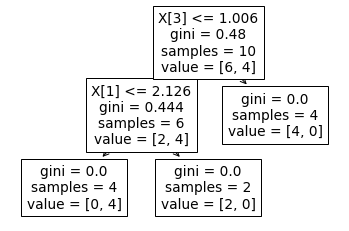

In [28]:
plot_tree(clf1)

[Text(0.6, 0.8333333333333334, 'X[0] <= 0.955\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.4, 0.5, 'X[1] <= 1.558\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

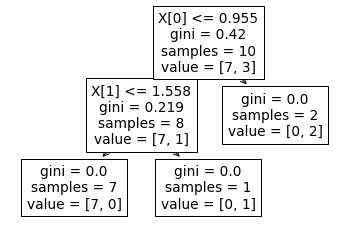

In [29]:
plot_tree(clf2)

[Text(0.6666666666666666, 0.875, 'X[4] <= 2.343\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.5, 0.625, 'X[2] <= 0.452\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.3333333333333333, 0.375, 'X[4] <= 1.894\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

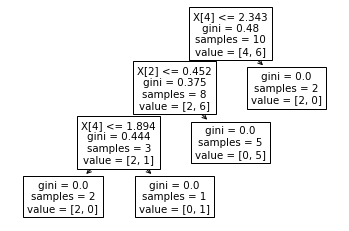

In [30]:
plot_tree(clf3)

In [34]:
clf1.predict(np.array([0.551380,-1.876815,-1.807618,-1.557932, -0.039809]).reshape(1,5))

C:\Users\hd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [36]:
clf2.predict(np.array([0.551380,-1.876815,-1.807618,-1.557932, -0.039809]).reshape(1,5))

C:\Users\hd\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [37]:
df.sample(14, replace=True)

,col1,col2,col3,col4,col5,target
79,3.325601,1.398354,3.156563,2.335418,0.945827,1
89,-0.110325,2.337542,-3.494985,0.408176,1.413734,0
16,1.044896,2.005104,0.489247,-2.575979,0.374483,0
76,-1.093497,0.985900,1.353040,1.170938,2.234680,0
94,-1.972347,1.666480,-2.765145,1.284082,1.086468,0
90,1.435049,1.523389,1.197845,0.841340,0.808871,1
70,-1.904024,1.291308,-2.446960,0.471580,-0.289659,0
63,-0.274913,1.958722,0.506159,0.554707,2.548411,1
70,-1.904024,1.291308,-2.446960,0.471580,-0.289659,0
77,1.215275,2.259401,0.337471,-0.245785,2.398531,0
